## Import pandas and dataset

In [36]:
import pandas as pd
import numpy as np

In [3]:
pd.__version__

'2.2.2'

In [128]:
df_raw = pd.read_csv('./dataset/laptops.csv', sep=',')

In [129]:
df_raw.columns = df_raw.columns.str.lower().str.replace(' ', '_')

In [130]:
df = df_raw[['ram', 'storage', 'screen', 'final_price']]

In [174]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [172]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

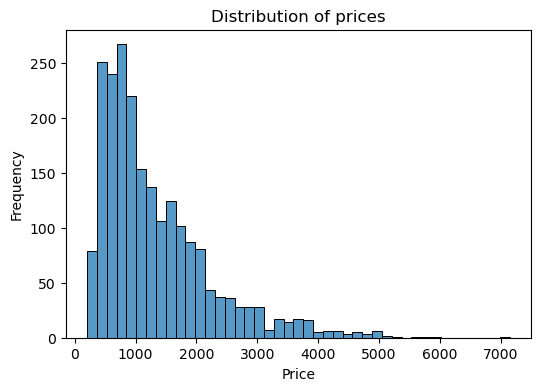

In [193]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

## Q1 Missing values

In [12]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Q2 Median of RAM

In [26]:
df['ram'].median()

16.0

## Q3 Preparring Dataset and Filling NA

In [271]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [272]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [316]:
def prepare_dataset(data, seed):
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)

    res_shuffled = data.iloc[idx]

    res_train = res_shuffled.iloc[:n_train].copy()
    res_val = res_shuffled.iloc[n_train:n_train+n_val].copy()
    res_test = res_shuffled.iloc[n_train+n_val:].copy()

    y_res_train_orig = res_train.final_price.values
    y_res_val_orig = res_val.final_price.values
    y_res_test_orig = res_test.final_price.values

    # y_res_train = np.log1p(res_train.final_price.values)
    # y_res_val = np.log1p(res_val.final_price.values)
    # y_res_test = np.log1p(res_test.final_price.values)

    del res_train['final_price']
    del res_val['final_price']
    del res_test['final_price']

    return res_train, res_val, res_test, y_res_train_orig, y_res_val_orig, y_res_test_orig

In [317]:
df_zeros = df.copy().fillna(0)
res_zeros_train, res_zeros_val, res_zeros_test, y_res_zeros_train, y_res_zeros_val, y_res_zeros_test = prepare_dataset(df_zeros, 42)

In [318]:
res_mean_train, res_mean_val, res_mean_test, y_res_mean_train, y_res_mean_val, y_res_mean_test = prepare_dataset(df.copy(), 42)
res_mean_train = res_mean_train.fillna(res_mean_train['screen'].mean())
res_mean_val = res_mean_val.fillna(res_mean_train['screen'].mean())
res_mean_test = res_mean_test.fillna(res_mean_train['screen'].mean())

In [319]:
w_0_zeros, w_zeros = train_linear_regression(res_zeros_train.values, y_res_zeros_train)

In [320]:
w_0_mean, w_mean = train_linear_regression(res_mean_train.values, y_res_mean_train)

In [321]:
def rmse(y, y_pred):
    err = y_pred - y
    mse = (err ** 2).mean()
    return np.sqrt(mse)

In [322]:
y_pred_zeros = w_0_zeros + res_zeros_train.values.dot(w_zeros)

In [323]:
round(rmse(y_res_zeros_train, y_pred_zeros), 2)

602.39

In [324]:
y_pred_mean = w_0_mean + res_mean_train.values.dot(w_mean)

In [325]:
round(rmse(y_res_mean_train, y_pred_mean), 2)

602.18

## Q4 Regulatization

In [326]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

In [327]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [328]:
for r in r_list:
    w_0_zeros_reg, w_zeros_reg = train_linear_regression_reg(res_zeros_train.values, y_res_zeros_train, r)
    y_pred_zeros_reg = w_0_zeros_reg + res_mean_val.values.dot(w_zeros_reg)
    print("r: ", r, ", rmse: ", rmse(y_res_zeros_val, y_pred_zeros_reg))

r:  0 , rmse:  599.53117153689
r:  0.01 , rmse:  599.5274480744628
r:  0.1 , rmse:  599.4943901537812
r:  1 , rmse:  599.2037680834469
r:  5 , rmse:  598.4508239048512
r:  10 , rmse:  598.044068647977
r:  100 , rmse:  597.4823660341914


## Q5 Seed testing

In [329]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [331]:
rmse_list = np.array([])

for s in seeds:
    df_q5 = df.copy().fillna(0)
    res_q5_train, res_q5_val, res_q5_test, y_res_q5_train, y_res_q5_val, y_res_q5_test = prepare_dataset(df_q5, s)
    w_0_q5, w_q5 = train_linear_regression(res_q5_train.values, y_res_q5_train)
    y_pred_q5 = w_0_q5 + res_q5_val.values.dot(w_q5)
    print(rmse(y_res_q5_val, y_pred_q5))
    rmse_list = np.append(rmse_list, rmse(y_res_q5_val, y_pred_q5))

565.4520868771027
636.7985423056726
588.9558697907962
597.8148920012521
571.962791511102
573.2383256618949
647.3438328407208
550.4398184485952
587.333503616991
576.1017929433108


In [332]:
round(rmse_list.std(), 3)

29.176

## Q6 Test on seed and R

In [340]:
df_dummy = df.copy().fillna(0)
res_q6_train, res_q6_val, res_q6_test, y_res_q6_train, y_res_q6_val, y_res_q6_test = prepare_dataset(df_dummy, 9)

In [346]:
df_q6_train = pd.concat([res_q6_train, res_q6_val], axis=0, ignore_index=True)
y_df_q6_train = np.concatenate([y_res_q6_train, y_res_q6_val])

In [349]:
w_0_q6, w_q6 = train_linear_regression_reg(df_q6_train.values, y_df_q6_train, 0.001)
y_pred_q6 = w_0_q6 + res_q6_test.values.dot(w_q6)
print(round(rmse(y_res_q6_test, y_pred_q6), 2))

608.61
